In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
from IPython.display import display
from uncertainties import umath as um
from uncertainties import unumpy as unp
from uncertainties import ufloat


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Используем засечковый шрифт
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"""
        \usepackage[utf8]{inputenc}
        \usepackage[russian]{babel}
        \usepackage[T2A]{fontenc}
    """,
    "pgf.texsystem": "xelatex"
})

def calculate_r2(x, y):
    
    popt, pcov = curve_fit(lambda x,k,b: k*x+b, x,y)

    y_true = y 
    y_pred = popt[0]*x + popt[1]

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)


def linear(x, y, label="", **kwargs):
    """Perform linear regression and plot results"""
    # Convert pandas Series to numpy arrays
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    
    popt, pcov = curve_fit(lambda x, k, b: k*x + b, x, y)
    x_min = np.min(x)
    x_max = np.max(x)
    x_ax = np.linspace(x_min, x_max, 100)
    y_ax = popt[0] * x_ax + popt[1]
    
    R2 = calculate_r2(x, y)
    
    plt.scatter(x, y)
    plt.plot(x_ax, y_ax, label=f"{label} $R^2$ = {R2:.5f}", **kwargs)
    
    coefs = unp.uarray(popt, np.sqrt(np.diag(pcov)))
    
    return coefs

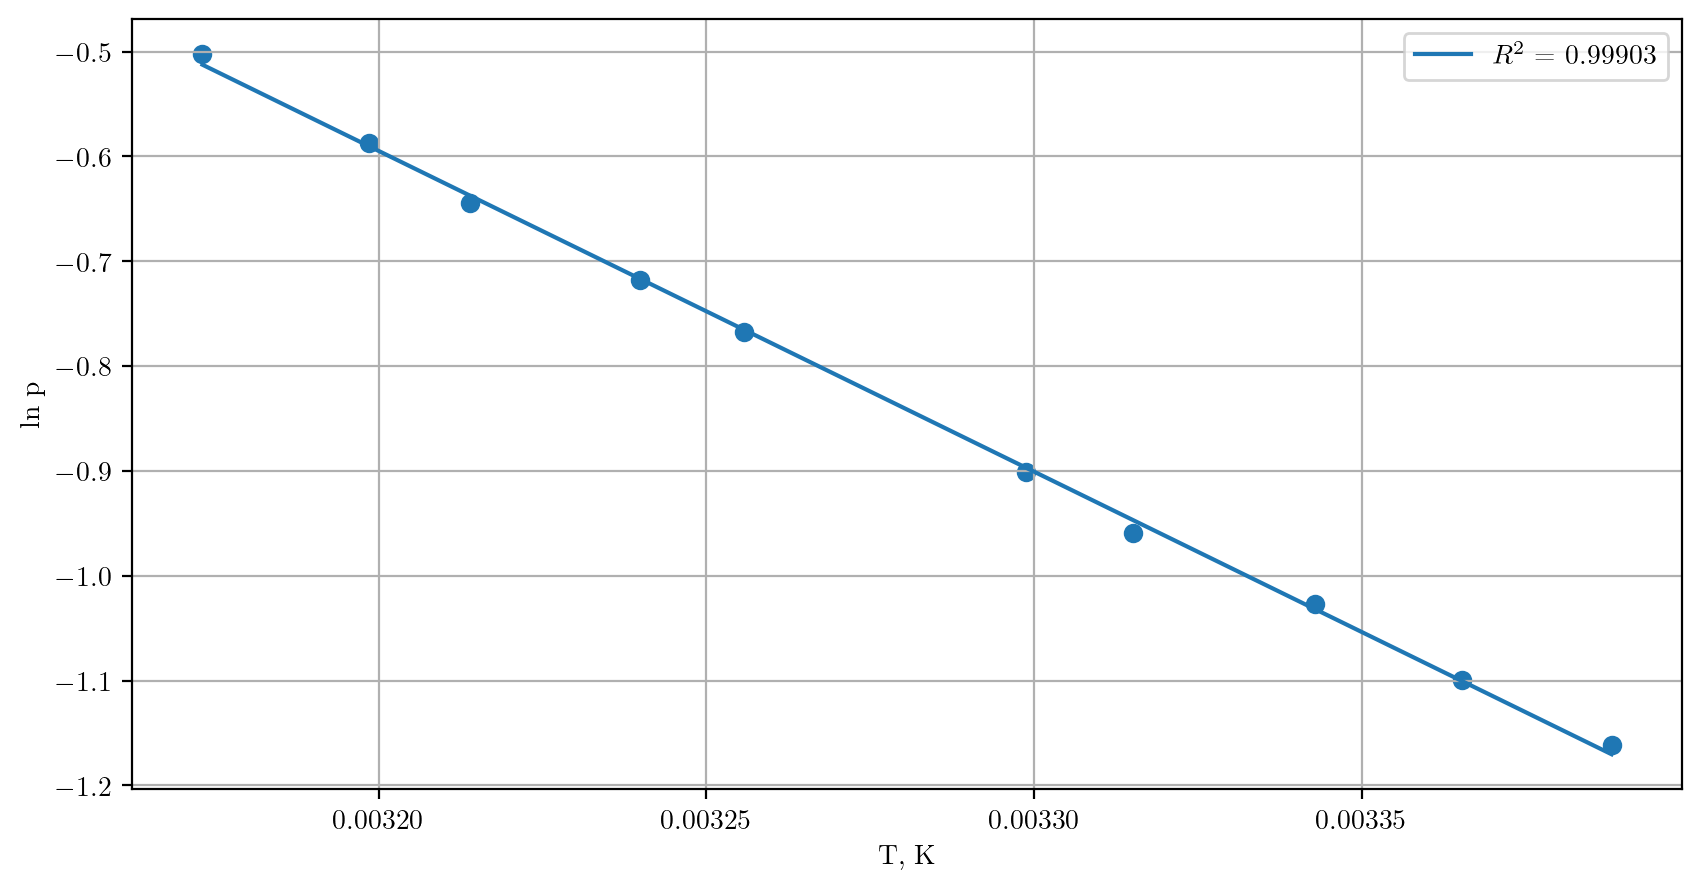

[-3059.3684386136333+/-33.76039714525695
 9.19513906916267+/-0.1107293702852972]
dH = (2.544+/-0.028)e+04
T = [22.  26.  30.  34.  38.  42.  39.5 35.5 28.5 24. ]
dS = 76.3+/-0.9
E = (5.58+/-0.15)e+03
| 22.0 | 295.15 |  0.003388  | 0.313 | -1.162 |
| 26.0 | 299.15 |  0.003343  | 0.358 | -1.027 |
| 30.0 | 303.15 |  0.003299  | 0.406 | -0.901 |
| 34.0 | 307.15 |  0.003256  | 0.464 | -0.768 |
| 38.0 | 311.15 |  0.003214  | 0.525 | -0.644 |
| 42.0 | 315.15 |  0.003173  | 0.605 | -0.503 |
| 39.5 | 312.65 |  0.003198  | 0.556 | -0.587 |
| 35.5 | 308.65 |  0.003240  | 0.488 | -0.717 |
| 28.5 | 301.65 |  0.003315  | 0.383 | -0.960 |
| 24.0 | 297.15 |  0.003365  | 0.333 | -1.100 |


In [5]:
T = np.array([22.0, 26.0, 30.0, 34.0, 38.0, 42.0, 39.5, 35.5, 32.0, 28.5, 24.0]) + 273.15
P = np.array([31.3, 35.8, 40.6, 46.4, 52.5, 60.5, 55.6, 48.8, 49.0, 38.3, 33.3]) / 100

T = np.array([22.0, 26.0, 30.0, 34.0, 38.0, 42.0, 39.5, 35.5,  28.5, 24.0]) + 273.15
P = np.array([31.3, 35.8, 40.6, 46.4, 52.5, 60.5, 55.6, 48.8,  38.3, 33.3]) / 100 #+ 1.01325


plt.figure(figsize=(10,5), dpi=200)
popt = linear(1/T, np.log(P))
plt.xlabel("T, К")
plt.ylabel("ln p")
plt.grid()
plt.legend()
plt.savefig("images/lnp-temp.png")
plt.show()

print(popt)

dH = -popt[0]*8.314
print(f"dH = {dH}")

T_ = popt[0] / (np.log(1.01325) - popt[1])
print(f"T = {T-273.15}")

dS = dH / T_
print(f"dS = {dS}")

E = 8.314 * T_**2 * 153.82 / (dH)
print(f"E = {E}")

for x in range(len(T)):
    print(f"| {T[x]-273.15} | {T[x]} |  {1/T[x]:3f}  | {P[x]:.3f} | {np.log(P[x]):.3f} |")